In [178]:
import numpy as np
import math
import scipy
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft,fftfreq
from scipy.signal import argrelextrema
from matplotlib.colors import LogNorm

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

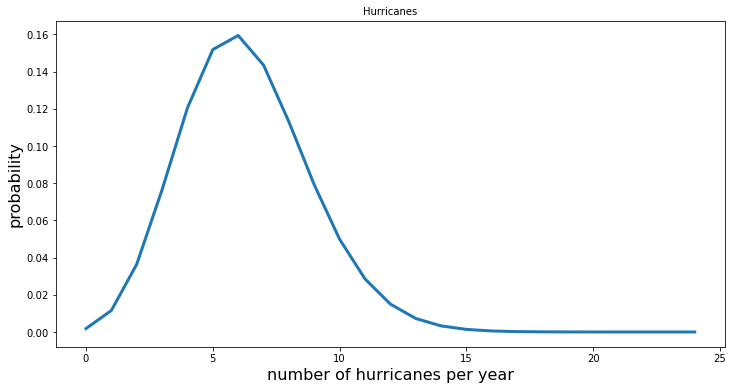

Z score: 3.4661629670697414 (larger than 3)
the probability of observing more than 15 hurricanes is: 0.0005279431738299246 that is smaller than 0.05 so it is safe to reject to reject the null hypothesis: 15 hurricanes is signficantly different


In [149]:
x0=15
mu=6.3
sigma=np.sqrt(lamda)
x=np.arange(25)

y=[(mu**n)*math.exp(-mu)*(1/math.factorial(n)) for n in x]  

fig = plt.figure(figsize=(12,6))
plt.plot(x, y, linewidth=3)
plt.xlabel('number of hurricanes per year', size=16)
plt.ylabel('probability',size=16)
plt.title('Hurricanes', size=10)
plt.show()
Z=(x0-mu)/(mu**0.5)
print('Z score:',Z,'(larger than 3)')


# calculate the p-value as the sum of the left tail + the right tail
pvalue = scipy.stats.norm.cdf(-Z) + (1. - scipy.stats.norm.cdf(Z))
# note that you can surely perform an integral of stats.norm.pdf, but using the cdf is much more convenient
print("the probability of observing more than 15 hurricanes is:", pvalue,'that is smaller than 0.05 so it is safe to reject to reject the null hypothesis: 15 hurricanes is signficantly different')


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

3.991846326292112


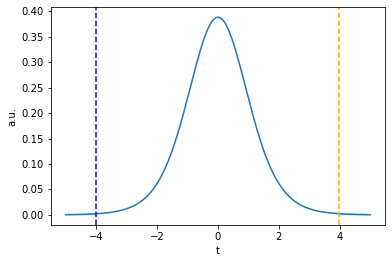

p-value = 0.0031489409354536393
Since the p-value is <  𝛼/2 =0.05/2 we reject thu null hypothesis
The change in blood pressures within our sample was statistically significant.


In [189]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

sigma=((np.std(pre)**2+np.std(post)**2)/2)**0.5

T=abs(np.mean(pre)-np.mean(post))/(sigma*((2/len(pre))**0.5))
print(abs(T))

xs = np.linspace(-5, +5, 1000)
ts = stats.t.pdf(xs, len(pre) - 1)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='lightblue')
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='blue')
plt.ylabel("a.u.")
plt.xlabel("t")
plt.show()

# now we calculate the p-value. Since it's double sided:
pvalue = (1.- stats.t.cdf(T, 9)) + ( stats.t.cdf(-T, 9))
print("p-value =", pvalue)
print("Since the p-value is <  𝛼/2 =0.05/2 we reject thu null hypothesis\nThe change in blood pressures within our sample was statistically significant.")

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

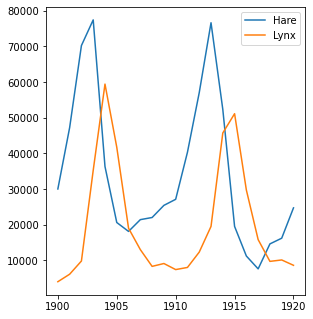

In [150]:
data = np.loadtxt('data/populations.txt').T
year, hares, lynxes, carrots = data

plt.axes([0, 0, 0.6, 1]) 
plt.plot(year, hares, year, lynxes) 
plt.legend(('Hare', 'Lynx'))

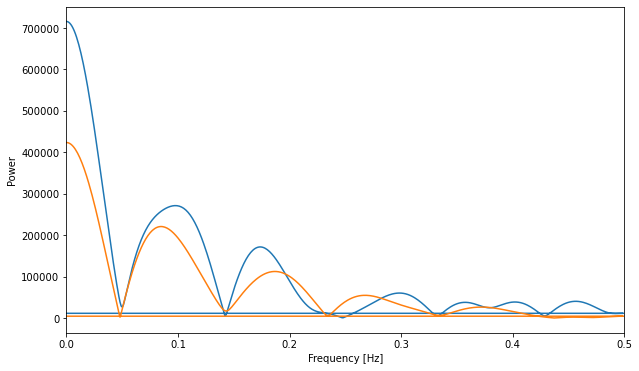

Peaks frequency hares: [0.098 0.174 0.298 0.357 0.402 0.456]
Peaks frequency lynxes: [0.085 0.187 0.268 0.372 0.455]
Period hares : 10.204081632653061 years
Period lynxes : 11.76470588235294 years


In [186]:
#Perform fft
hares_fft = fft(hares,n=1000)
lynxes_fft = fft(lynxes,n=1000)

power_hares = np.abs(hares_fft)
power_lynxes = np.abs(lynxes_fft)

# The return the corresponding frequencies
freq_hares = fftfreq(hares_fft.size)
freq_lynxes = fftfreq(hares_fft.size)

# Plot the FFT power
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(freq_hares, power_hares)
ax.plot(freq_lynxes, power_lynxes)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')
ax.set_xlim([0, 0.5])
plt.show()

peak_freq_hares = freq_hares[argrelextrema(power_hares, np.greater)]
peak_freq_hares=peak_freq_hares[peak_freq_hares>0]
print("Peaks frequency hares:", peak_freq_hares)

peak_freq_lynxes = freq_lynxes[argrelextrema(power_lynxes, np.greater)]
peak_freq_lynxes=peak_freq_lynxes[peak_freq_lynxes>0]
print("Peaks frequency lynxes:", peak_freq_lynxes)

print('Period hares :', 1/peak_freq_hares[0], 'years')
print('Period lynxes :', 1/peak_freq_lynxes[0], 'years')

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

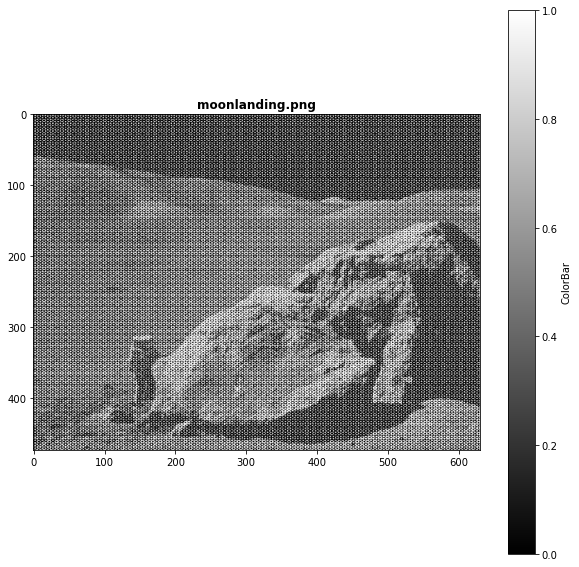

In [151]:
moon = plt.imread("moonlanding.png")
fig, ax = plt.subplots(figsize=(10, 10))
shw=ax.imshow(moon,plt.cm.gray)
bar=plt.colorbar(shw)
plt.title('moonlanding.png',fontweight ="bold")
bar.set_label('ColorBar')
plt.show()

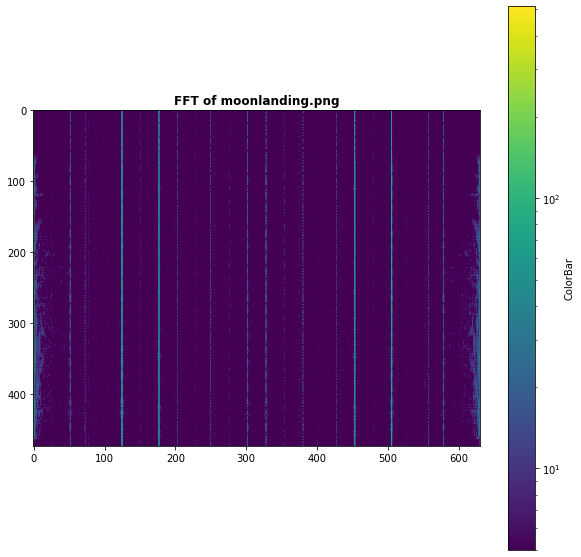

In [152]:
fftmoon=fft(moon)
fig, ax = plt.subplots(figsize=(10, 10))
shw=ax.imshow(abs(fftmoon), norm=LogNorm(vmin=5))
bar=plt.colorbar(shw)
plt.title('FFT of moonlanding.png',fontweight ="bold")
bar.set_label('ColorBar')
plt.show()

It seems that the fft of the noise are 4 verticale lignes, we can zoom on them to get their position.


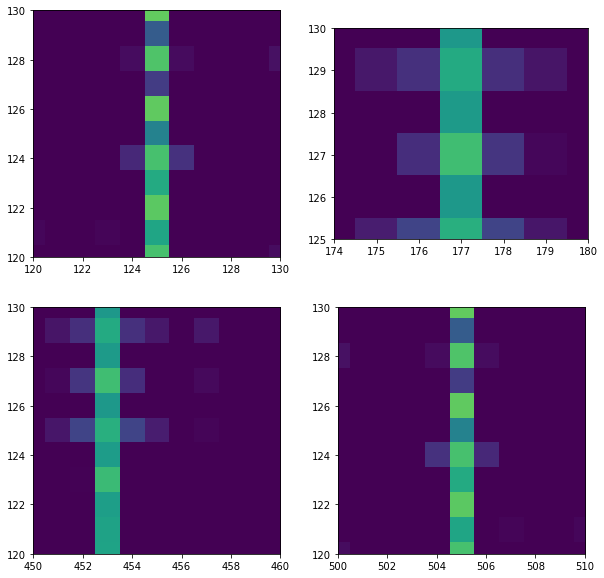

In [153]:
print("It seems that the fft of the noise are 4 verticale lignes, we can zoom on them to get their position.")

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(221)
plt.xlim(120, 130)
plt.ylim(120, 130)
ax2 = fig.add_subplot(222)
plt.xlim(174, 180)
plt.ylim(125, 130)
ax3 = fig.add_subplot(223)
plt.xlim(450, 460)
plt.ylim(120, 130)
ax4 = fig.add_subplot(224)
plt.xlim(500, 510)
plt.ylim(120, 130)
ax1.imshow(abs(fftmoon), norm=LogNorm(vmin=5))
ax2.imshow(abs(fftmoon), norm=LogNorm(vmin=5))
ax3.imshow(abs(fftmoon), norm=LogNorm(vmin=5))
ax4.imshow(abs(fftmoon), norm=LogNorm(vmin=5))
plt.show()

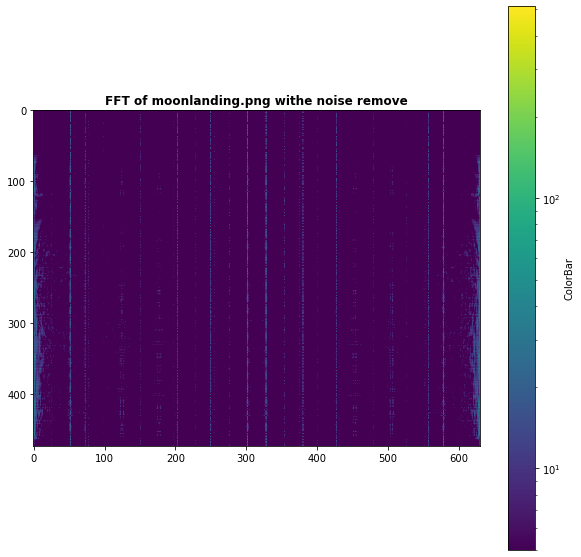

In [154]:
fftmoon_nonoise=np.copy(fftmoon)

fftmoon_nonoise[:,125]=0
fftmoon_nonoise[:,177]=0
fftmoon_nonoise[:,453]=0
fftmoon_nonoise[:,505]=0

fig, ax = plt.subplots(figsize=(10, 10))
shw=ax.imshow(abs(fftmoon_nonoise), norm=LogNorm(vmin=5))
bar=plt.colorbar(shw)
plt.title('FFT of moonlanding.png withe noise remove',fontweight ="bold")
bar.set_label('ColorBar')
plt.show()

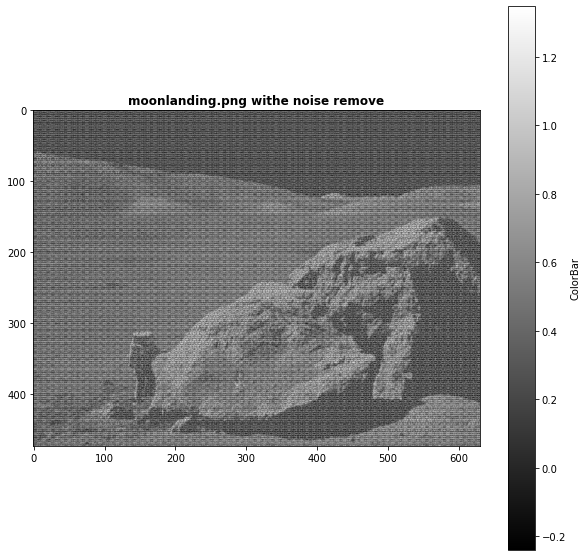

In [155]:
moon_nonoise=ifft(fftmoon_nonoise)

fig, ax = plt.subplots(figsize=(10, 10))
shw=ax.imshow(moon_nonoise.real,plt.cm.gray)
bar=plt.colorbar(shw)
plt.title('moonlanding.png withe noise remove',fontweight ="bold")
bar.set_label('ColorBar')
plt.show()